**Questão-01**

O objetivo dessa questão é atraves do uso de redes neurais conseguir aproximar funções. O enuciado fornece duas funções como vemos abaixo.Também é proposto a criação dos graficos das funções e o grafico do erro medio de treinamento em relação a epoca de treinamento.

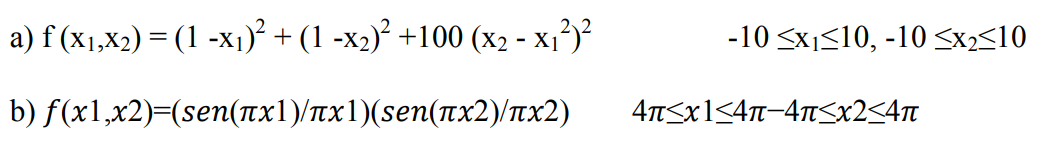





In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [23]:
#FUNÇÃO 1 
def funcao1(x1, x2):
  z = (1-x1)**2 + (1-x2)**2 + 100*(x2 - x1**2)**2 
  return z


In [24]:
# MONTANDO NOSSO CONJUNTO DE TESTE
x1, x2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
y = funcao1(x1,x2)



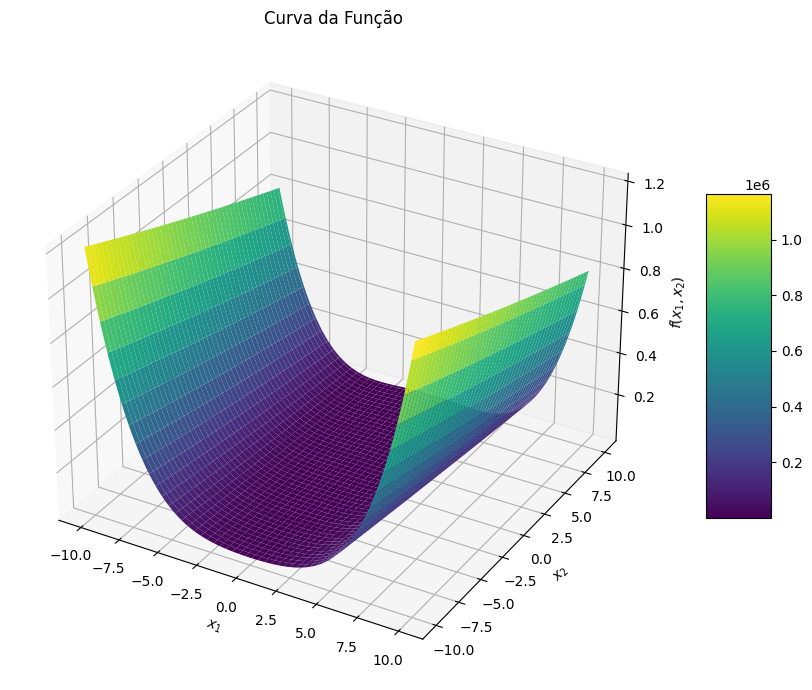

In [25]:
# Plotar o gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x1, x2, y, cmap='viridis')

# Adicionar marcador de intensidade de cor
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Personalizar o gráfico
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.set_title('Curva da Função')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [26]:
# Divisão conjunto treino e teste 
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    y.flatten(), 
    test_size=0.2, 
    random_state=42
)

In [27]:
# Criando a arquitetura da rede neural
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)



In [28]:
#Normalização de Dados
scaler = StandardScaler()

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Ajustando o scaler aos dados de treinamento
scaler.fit(y_train)
 
# Ajustando o scaler aos dados de treinamento
y_train = scaler.transform(y_train)
 
# Ajustando o scaler aos dados de teste
y_test = scaler.transform(y_test)

In [29]:
# Definir callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
]

# Treinar modelo
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=2000,
    validation_split=0.1,
    callbacks=callbacks
)

Epoch 1/2000
900/900 [==============================] - 6s 4ms/step - loss: 0.2359 - val_loss: 0.0487 - lr: 0.0010
Epoch 2/2000
900/900 [==============================] - 3s 3ms/step - loss: 0.0242 - val_loss: 0.0257 - lr: 0.0010
Epoch 3/2000
900/900 [==============================] - 6s 6ms/step - loss: 0.0258 - val_loss: 0.0229 - lr: 0.0010
Epoch 4/2000
900/900 [==============================] - 5s 6ms/step - loss: 0.0107 - val_loss: 0.0038 - lr: 0.0010
Epoch 5/2000
900/900 [==============================] - 6s 7ms/step - loss: 0.0113 - val_loss: 0.0070 - lr: 0.0010
Epoch 6/2000
900/900 [==============================] - 5s 6ms/step - loss: 0.0081 - val_loss: 0.0277 - lr: 0.0010
Epoch 7/2000
900/900 [==============================] - 3s 3ms/step - loss: 0.0122 - val_loss: 0.0022 - lr: 0.0010
Epoch 8/2000
900/900 [==============================] - 3s 3ms/step - loss: 0.0063 - val_loss: 0.0134 - lr: 0.0010
Epoch 9/2000
900/900 [==============================] - 3s 3ms/step - loss: 0.01

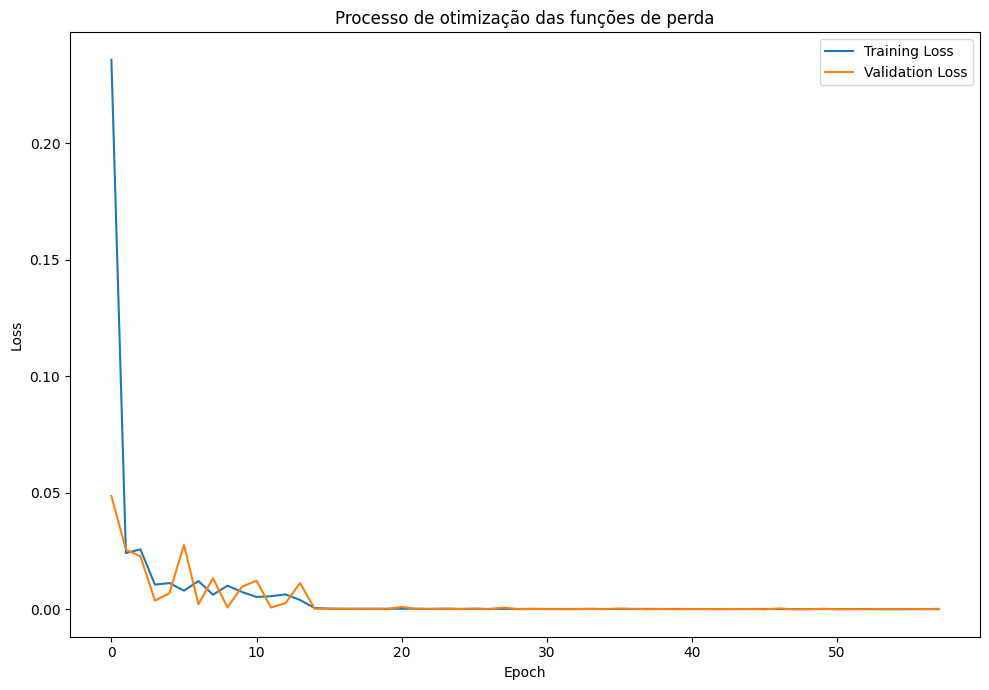

In [30]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [31]:
predictions = mlp.predict(x_test)
inverse_predictions = scaler.inverse_transform(predictions)


63/63 [==============================] - 0s 1ms/step


In [32]:
# Calcular MAE
mae = mean_absolute_error(y_test, predictions)

# Calcular MSE
mse = mean_squared_error(y_test, predictions)

# Calcular RMSE
rmse = np.sqrt(mse)

# Calcular R²
r2 = r2_score(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.009930533801892608
MSE: 0.0003054846689038663
RMSE: 0.017478119718775997
R²: 0.9997037417901485


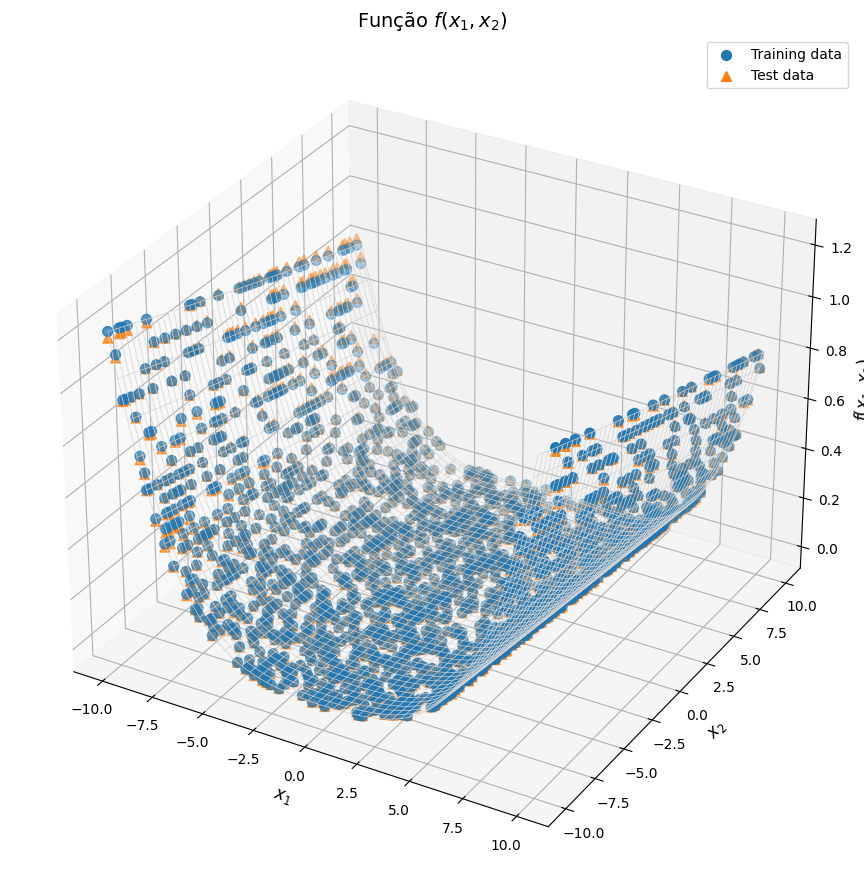

In [33]:
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, y, linewidths=0.5, color='lightgrey')
ax.scatter(x_test[:, 0], x_test[:, 1], scaler.inverse_transform(y_test), s=50, color='C0', label='Training data')
ax.scatter(x_test[:, 0], x_test[:, 1], inverse_predictions, s=50, marker='^', color='C1', label='Test data')

ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_zlabel('$f(x_1, x_2)$', fontsize=12)
ax.set_title('Função $f(x_1, x_2)$', fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

## B - Questão 2

In [3]:
#FUNÇÃO 2
def funcao2(x1, x2):
  z = ((np.sin((np.pi)*x1))/((np.pi)*x1))*((np.sin((np.pi)*x2))/((np.pi)*x2))
  return z

In [4]:
# MONTANDO NOSSO CONJUNTO DE TESTE
x1, x2 = np.meshgrid(np.linspace(-(4*(np.pi)), (4*(np.pi)), 100), np.linspace(-(4*(np.pi)), (4*(np.pi)), 100))
y = funcao2(x1,x2)



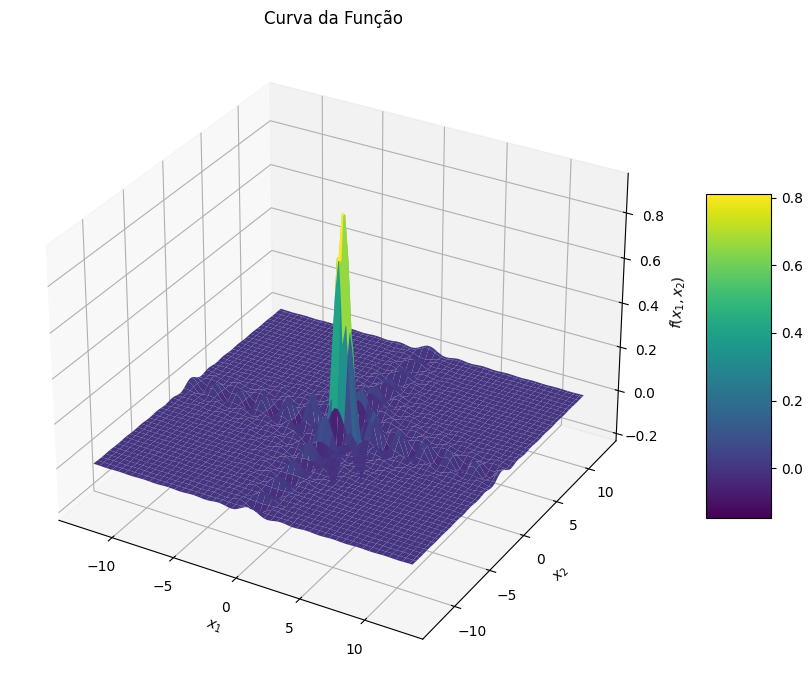

In [5]:
# Plotar o gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x1, x2, y, cmap='viridis')

# Adicionar marcador de intensidade de cor
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Personalizar o gráfico
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.set_title('Curva da Função')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [6]:
# Divisão conjunto treino e teste 
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    y.flatten(), 
    test_size=0.2, 
    random_state=42
)

In [7]:
# Criando a arquitetura da rede neural
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)




In [8]:
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=2000,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/2000
900/900 [==============================] - 10s 3ms/step - loss: 0.0125 - val_loss: 0.0024 - lr: 0.0010
Epoch 2/2000
900/900 [==============================] - 4s 4ms/step - loss: 0.0011 - val_loss: 0.0022 - lr: 0.0010
Epoch 3/2000
900/900 [==============================] - 3s 3ms/step - loss: 8.4189e-04 - val_loss: 0.0014 - lr: 0.0010
Epoch 4/2000
900/900 [==============================] - 3s 3ms/step - loss: 5.7573e-04 - val_loss: 0.0011 - lr: 0.0010
Epoch 5/2000
900/900 [==============================] - 3s 3ms/step - loss: 3.6702e-04 - val_loss: 5.4094e-04 - lr: 0.0010
Epoch 6/2000
900/900 [==============================] - 4s 4ms/step - loss: 3.3831e-04 - val_loss: 4.3287e-04 - lr: 0.0010
Epoch 7/2000
900/900 [==============================] - 3s 3ms/step - loss: 2.7883e-04 - val_loss: 3.8668e-04 - lr: 0.0010
Epoch 8/2000
900/900 [==============================] - 3s 3ms/step - loss: 2.9656e-04 - val_loss: 7.4139e-04 - lr: 0.0010
Epoch 9/2000
900/900 [=================

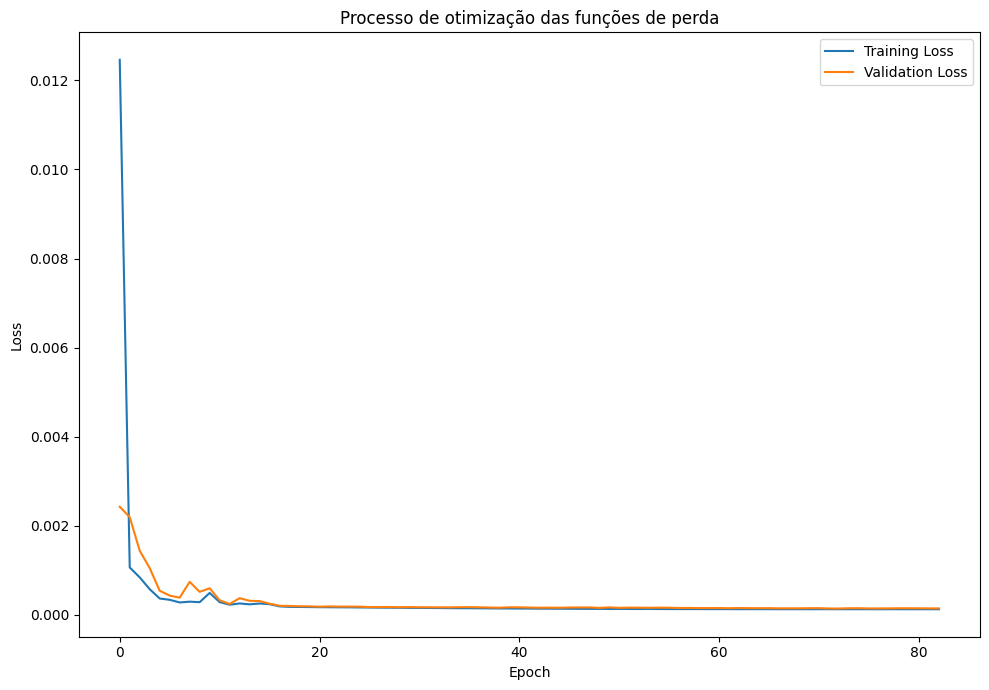

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [11]:
predictions = mlp.predict(x_test)
# inverse_predictions = scaler.inverse_transform(predictions)

63/63 [==============================] - 0s 3ms/step


In [12]:
# Calcular MAE
mae = mean_absolute_error(y_test, predictions)

# Calcular MSE
mse = mean_squared_error(y_test, predictions)

# Calcular RMSE
rmse = np.sqrt(mse)

# Calcular R²
r2 = r2_score(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.005285863177340185
MSE: 0.00019424261004313524
RMSE: 0.013937094749019082
R²: 0.9307720810357348


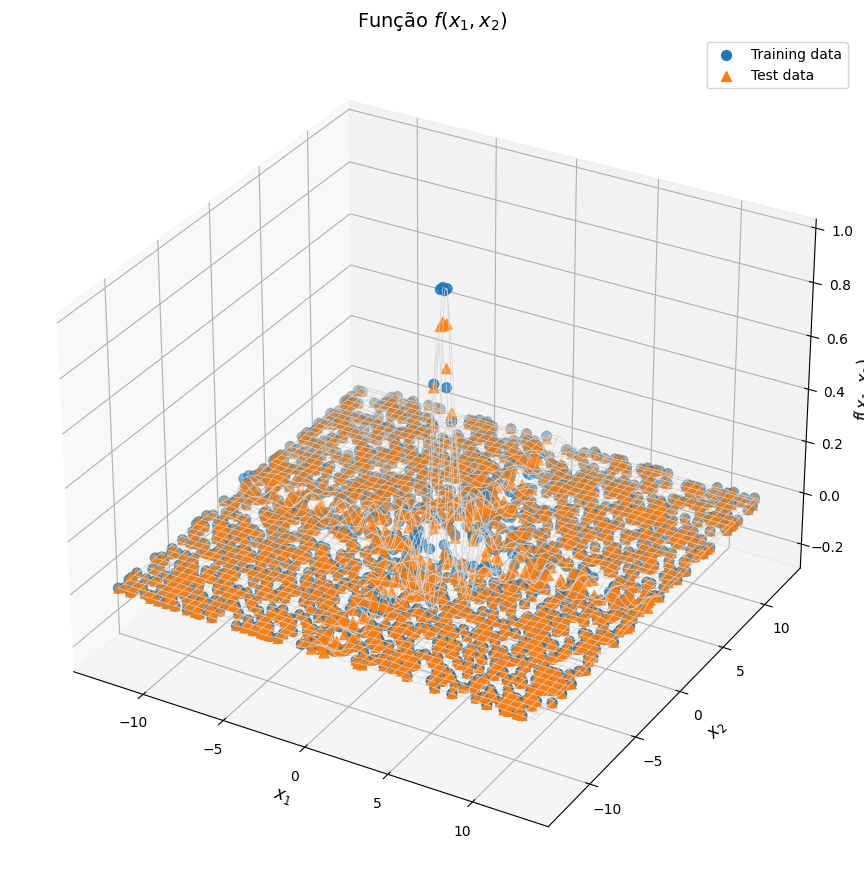

In [24]:
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, y, linewidths=0.5, color='lightgrey')
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, s=50, color='C0', label='Training data')
ax.scatter(x_test[:, 0], x_test[:, 1], predictions, s=50, marker='^', color='C1', label='Test data')

ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_zlabel('$f(x_1, x_2)$', fontsize=12)
ax.set_title('Função $f(x_1, x_2)$', fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

## **Questão 2 **
Devemos conseguir definir a que classe os dados pertencem dentro de uma figura(pontos dentro de funções matematicas)

![image.png](
  
)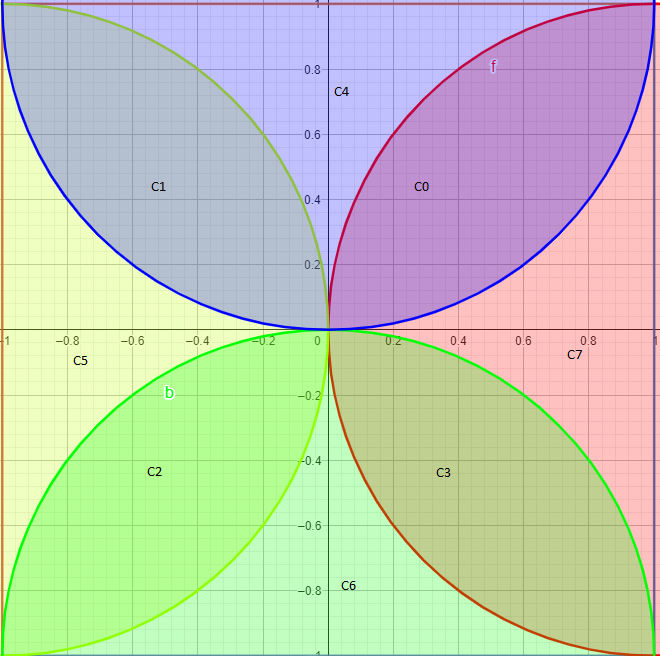

In [45]:
# Funções
def vermelha(x,y):
  if (x-1)**2+y**2<=1:
    return 1
  else:
    return 0 

def amarela(x,y):
  if (x+1)**2+y**2<=1:
    return 1
  else:
    return 0 

def verde(x,y):
  if x**2+(y+1)**2<=1:
    return 1
  else:
    return 0 

def azul(x,y):
  if x**2+(y-1)**2<=1:
    return 1
  else:
    return 0 



In [46]:
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))


In [47]:
points = np.vstack(list(zip(x.ravel(), y.ravel())))

lista = []
for x_i, y_i in points:
  if vermelha(x_i, y_i) & azul(x_i, y_i):
    lista.append(0)
  elif azul(x_i, y_i) & amarela(x_i, y_i):
     lista.append(1)
  elif amarela(x_i, y_i) & verde(x_i, y_i):
     lista.append(2)
  elif verde(x_i, y_i) & vermelha(x_i, y_i):
    lista.append(3)
  elif azul(x_i, y_i) & (not amarela(x_i, y_i)) & (not vermelha(x_i, y_i)):
    lista.append(4)
  elif amarela(x_i, y_i) & (not azul(x_i, y_i)) & (not verde(x_i, y_i)):
    lista.append(5)
  elif verde(x_i, y_i) & (not amarela(x_i, y_i)) & (not vermelha(x_i, y_i)):
    lista.append(6)
  elif vermelha(x_i, y_i) & (not azul(x_i, y_i)) & (not verde(x_i, y_i)):
    lista.append(7)

labels = np.array(lista)


In [48]:
x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, stratify=labels)


In [49]:
mlp = Sequential([
    Dense(124, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='softmax')
])

mlp.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)


mlp.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 124)               372       
                                                                 
 dense_24 (Dense)            (None, 32)                4000      
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
Total params: 5,036
Trainable params: 5,036
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = mlp.fit(
    x_train, y_train.reshape((-1,1)),
    validation_split=0.1,
    batch_size=8,
    epochs=30,
)

Epoch 1/30
900/900 [==============================] - 5s 4ms/step - loss: 0.6242 - acc: 0.7883 - val_loss: 0.3388 - val_acc: 0.8712
Epoch 2/30
900/900 [==============================] - 3s 3ms/step - loss: 0.2784 - acc: 0.8981 - val_loss: 0.2759 - val_acc: 0.8975
Epoch 3/30
900/900 [==============================] - 3s 3ms/step - loss: 0.2403 - acc: 0.9054 - val_loss: 0.2520 - val_acc: 0.9038
Epoch 4/30
900/900 [==============================] - 3s 3ms/step - loss: 0.2101 - acc: 0.9164 - val_loss: 0.2531 - val_acc: 0.8963
Epoch 5/30
900/900 [==============================] - 3s 3ms/step - loss: 0.1893 - acc: 0.9312 - val_loss: 0.2318 - val_acc: 0.9112
Epoch 6/30
900/900 [==============================] - 3s 3ms/step - loss: 0.1779 - acc: 0.9307 - val_loss: 0.1922 - val_acc: 0.9125
Epoch 7/30
900/900 [==============================] - 3s 3ms/step - loss: 0.1632 - acc: 0.9328 - val_loss: 0.1597 - val_acc: 0.9350
Epoch 8/30
900/900 [==============================] - 3s 3ms/step - loss: 0.

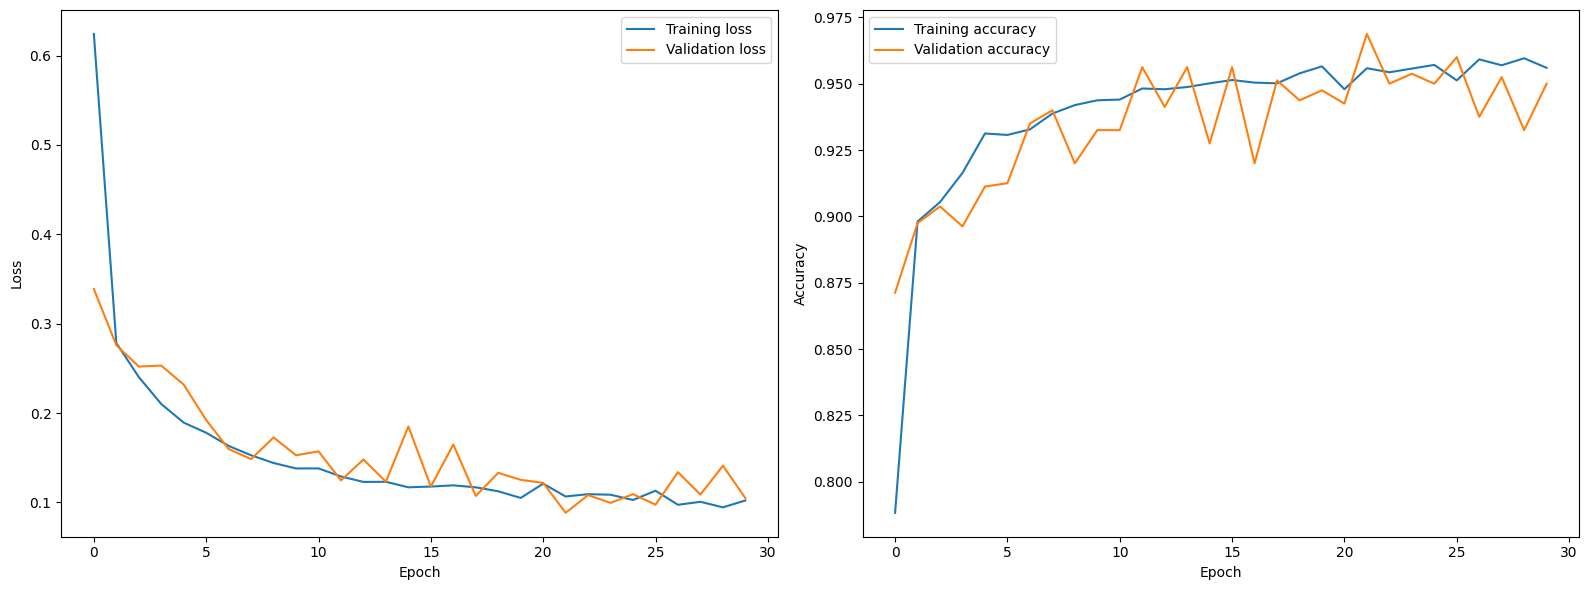

In [51]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')

ax[0].legend()
ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)

ax[1].plot(history.history['acc'], label='Training accuracy')
ax[1].plot(history.history['val_acc'], label='Validation accuracy')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [52]:
predictions = [np.argmax(p) for p in mlp.predict(x_test)]


63/63 [==============================] - 0s 1ms/step


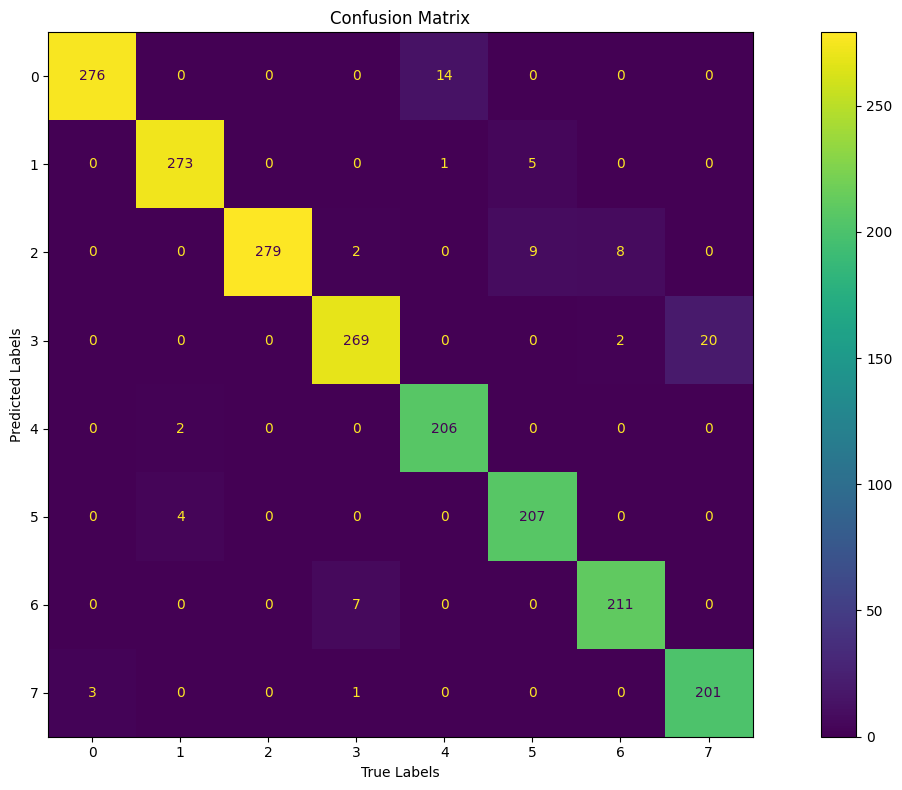

In [53]:
fig, ax = plt.subplots(figsize=(14, 8))

ConfusionMatrixDisplay(confusion_matrix(predictions, y_test)).plot(values_format='.0f', ax=ax)

ax.set(
    title='Confusion Matrix',
    xlabel='True Labels',
    ylabel='Predicted Labels'
)

plt.tight_layout()
plt.show()

## Questão 3

Devemos  apresentar os resultados da classificação em uma matriz de confusão para uma rede neural convolucional treinada na base de dados CIFAR-10. A base de dados CIFAR-10 consiste em 60 mil imagens coloridas de 32x32 pixels, divididas em 10 classes diferentes: avião, navio, caminhão, automóvel, sapo, pássaro, cachorro, gato, cavalo e cervo.

In [54]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Definir as classes corretas
class_names = ['avião', 'navio', 'caminhão', 'automóvel', 'sapo', 'pássaro', 'cachorro', 'gato', 'cavalo', 'cervo']

# Carregar os dados de treinamento e teste do CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [56]:
# Pré-processar os dados de entrada
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)



In [57]:
# Codificar os rótulos 
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [58]:
# Carregar a rede pré-treinada VGG16 
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Criar o modelo final
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Congelar os pesos das camadas da VGG16
base_model.trainable = False


In [59]:
# Compilar o modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [60]:
# Treinar o modelo
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 13s 15ms/step - loss: 1.5062 - accuracy: 0.5499 - val_loss: 1.1232 - val_accuracy: 0.6181
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 0.9841 - accuracy: 0.6577 - val_loss: 1.0559 - val_accuracy: 0.6430
Epoch 3/10
782/782 [==============================] - 11s 13ms/step - loss: 0.8680 - accuracy: 0.6962 - val_loss: 1.0291 - val_accuracy: 0.6577
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 0.7887 - accuracy: 0.7225 - val_loss: 1.0477 - val_accuracy: 0.6605
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 0.7151 - accuracy: 0.7474 - val_loss: 1.0721 - val_accuracy: 0.6585
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.6433 - accuracy: 0.7691 - val_loss: 1.1010 - val_accuracy: 0.6603
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.5770 - accuracy: 0.7944 - val_loss: 1.1351 - val_accuracy:

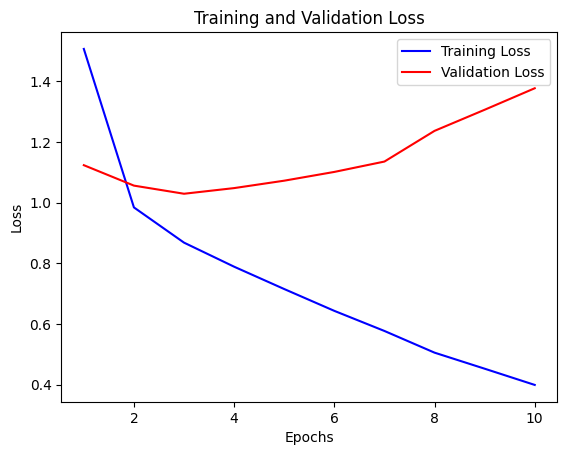

In [61]:
# Extrair o histórico de perda do conjunto de treinamento e teste
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotar o gráfico de erro em relação às épocas
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [62]:
# Fazer previsões nos dados de teste
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 [==============================] - 2s 7ms/step


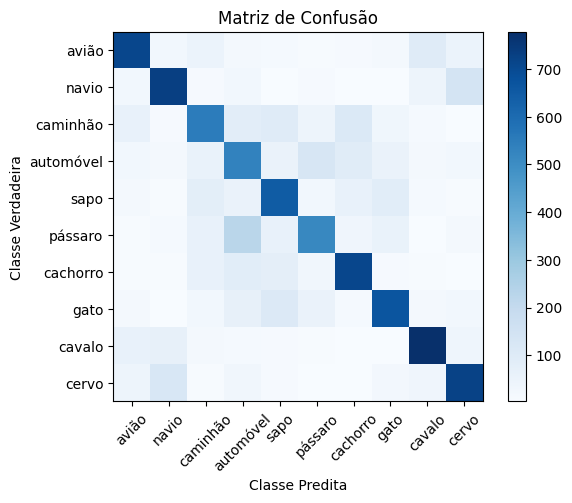

In [63]:
# Calcular a matriz de confusão
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plotar a matriz de confusão
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()